In [4]:
# Продвинутый EDA для проекта Jane AI Assistant
# Часть 1: Глубокий анализ материалов курса (PDF)
# Часть 2: Детальный анализ студенческих работ (DOCX)

import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Для анализа текста
import pdfplumber
from docx import Document
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from langdetect import detect, LangDetectException

# Скачиваем необходимые ресурсы NLTK
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Настройки
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

# Пути к данным
DATA_DIR = Path('data')
BOOKS_DIR = DATA_DIR / 'books'
STUDENT_WORKS_DIR = DATA_DIR / 'student-works'

print("=" * 80)
print("ГЛУБОКИЙ EDA АНАЛИЗ ДЛЯ JANE AI ASSISTANT")
print("=" * 80)

ГЛУБОКИЙ EDA АНАЛИЗ ДЛЯ JANE AI ASSISTANT



ЧАСТЬ 1: ДЕТАЛЬНЫЙ АНАЛИЗ МАТЕРИАЛОВ КУРСА (PDF)

📚 АНАЛИЗ МАТЕРИАЛОВ КУРСА (9 PDF файлов)

Книга 1/9: 2006_Charlz_Lendri_Kreativny_gorod.pdf
  Язык: ru
  Длина текста: 11,244 слов
  Читаемость: 8.92
  Ключевых слов: 20
  Урбанистических тем: 1
  Топ-5 ключевых слов: города(96), город(68), городов(41), новые(35), развития(35)
  Основные темы: культурное наследие(3)

Книга 2/9: Ольденбург Р. Третье место.pdf
  Язык: ru
  Длина текста: 11,256 слов
  Читаемость: 8.17
  Ключевых слов: 20
  Урбанистических тем: 2
  Топ-5 ключевых слов: жизни(66), места(65), люди(47), мест(37), предисловие(29)
  Основные темы: городское планирование(1), общественные пространства(1)

Книга 3/9: Лeо_Xоллис_Гоpода_вaм_на_пользу_Гeний_мeгаполиса.pdf
  Язык: ru
  Длина текста: 11,003 слов
  Читаемость: 8.92
  Ключевых слов: 20
  Урбанистических тем: 1
  Топ-5 ключевых слов: город(109), города(73), жизни(29), глава(28), городе(28)
  Основные темы: общественные пространства(6)

Книга 4/9: glaza_ustremlennye_na_ul

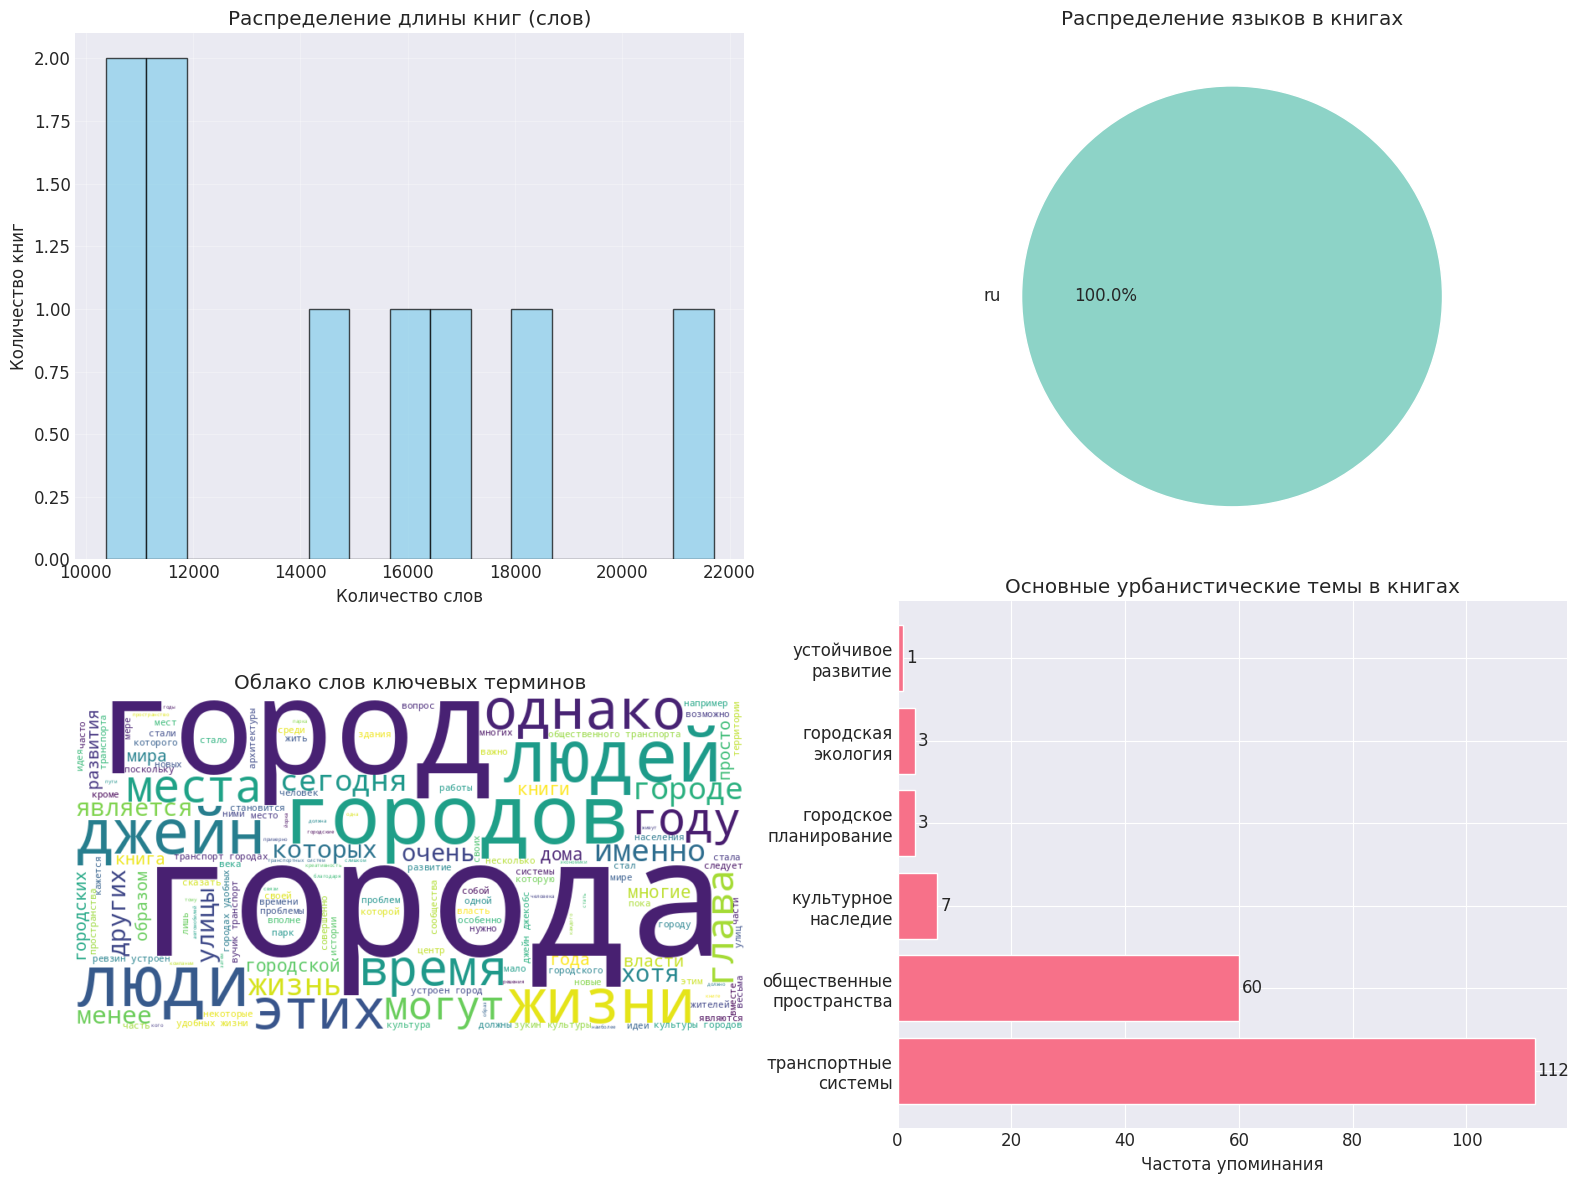


🔍 ВЫЯВЛЕННЫЕ ОСОБЕННОСТИ МАТЕРИАЛОВ КУРСА:
--------------------------------------------------
  1. Простые для чтения тексты: 9 книг
  2. Основные темы: транспортные системы, общественные пространства, культурное наследие, городское планирование, городская экология

📊 СТАТИСТИКА МАТЕРИАЛОВ КУРСА:
--------------------------------------------------
Всего книг: 9
Общее количество слов: 131,461
Средняя длина книги: 14,607 слов
Средняя длина слова: 6.04 символов
Средняя оценка читаемости: 8.22
Всего выявлено тем: 6
Самые частые темы:
  • транспортные системы: 112 упоминаний
  • общественные пространства: 60 упоминаний
  • культурное наследие: 7 упоминаний


In [15]:
import pdfplumber
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from langdetect import detect, LangDetectException
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Скачиваем стоп-слова для русского и английского языков
try:
    nltk.data.find('corpora/stopwords')
except:
    nltk.download('stopwords')

class CourseMaterialsAnalyzer:
    """Анализатор материалов курса (PDF)"""

    def __init__(self, books_dir):
        self.books_dir = books_dir
        self.pdf_files = list(books_dir.glob("*.pdf"))
        self.results = []
        self.all_text = ""
        # Собираем стоп-слова для нескольких языков
        self.stopwords_set = set()
        self.stopwords_set.update(stopwords.words('russian'))
        self.stopwords_set.update(stopwords.words('english'))
        # Добавляем дополнительные стоп-слова
        self.stopwords_set.update([
            'это', 'вот', 'что', 'как', 'так', 'и', 'а', 'но', 'да', 'нет',
            'или', 'ли', 'же', 'бы', 'б', 'ведь', 'вроде', 'дескать', 'мол',
            'ну', 'же', 'то', 'все', 'всё', 'еще', 'ещё', 'уже', 'тоже',
            'также', 'либо', 'нибудь', 'какой', 'какая', 'какое', 'какие',
            'чей', 'чья', 'чьё', 'чьи', 'сколько', 'который', 'которая',
            'которое', 'которые', 'никто', 'ничто', 'некий', 'некоторый',
            'некий', 'некоторый', 'какой-то', 'кое-какой', 'чей-то',
            'некто', 'нечто', 'некий', 'сам', 'сама', 'само', 'сами',
            'весь', 'вся', 'всё', 'все', 'всю', 'всем', 'всеми', 'всём',
            'каждый', 'каждая', 'каждое', 'каждые', 'любой', 'любая',
            'любое', 'любые', 'иной', 'иная', 'иное', 'иные', 'другой',
            'другая', 'другое', 'другие', 'самый', 'самая', 'самое',
            'самые', 'наш', 'наша', 'наше', 'наши', 'ваш', 'ваша', 'ваше',
            'ваши', 'их', 'его', 'её', 'их', 'свой', 'своя', 'своё', 'свои',
            'кто', 'что', 'какой', 'каков', 'чей', 'который', 'сколько',
            'где', 'куда', 'откуда', 'когда', 'почему', 'зачем', 'как',
            'столько', 'на', 'в', 'под', 'над', 'перед', 'за', 'между',
            'через', 'из', 'от', 'до', 'без', 'для', 'по', 'о', 'об',
            'со', 'то', 'этот', 'эта', 'это', 'эти', 'тот', 'та', 'то',
            'те', 'такой', 'такая', 'такое', 'такие', 'таков', 'такого',
            'такому', 'таким', 'таком', 'такая', 'такой', 'такую', 'такою',
            'такое', 'такие', 'таких', 'таким', 'такими', 'сей', 'сия',
            'сие', 'сии', 'оный', 'она', 'оно', 'они', 'себя', 'тебя',
            'вас', 'нас', 'меня', 'его', 'её', 'их', 'мой', 'твой', 'свой'
        ])

    def extract_text_from_pdf(self, pdf_path, max_pages=50):
        """Извлечение текста из PDF с ограничением по страницам"""
        text = ""
        try:
            with pdfplumber.open(pdf_path) as pdf:
                for i, page in enumerate(pdf.pages[:max_pages]):
                    page_text = page.extract_text()
                    if page_text:
                        text += page_text + "\n"
        except Exception as e:
            print(f"Ошибка при чтении {pdf_path.name}: {e}")
        return text

    def analyze_language(self, text):
        """Анализ языка текста"""
        try:
            return detect(text[:1000])
        except LangDetectException:
            return "unknown"

    def analyze_text_quality(self, text):
        """Анализ качества текста"""
        if not text:
            return {
                'total_chars': 0,
                'total_words': 0,
                'avg_word_length': 0,
                'special_chars_ratio': 0,
                'readability_score': 0
            }

        # Подсчет символов и слов
        total_chars = len(text)
        words = text.split()
        total_words = len(words)

        # Средняя длина слова
        avg_word_length = sum(len(word) for word in words) / max(total_words, 1)

        # Доля специальных символов
        special_chars = len(re.findall(r'[^\w\s]', text))
        special_chars_ratio = special_chars / max(total_chars, 1)

        # Простая оценка читаемости (на основе средней длины слова и предложений)
        sentences = re.split(r'[.!?]+', text)
        num_sentences = len([s for s in sentences if s.strip()])
        avg_sentence_length = total_words / max(num_sentences, 1)

        # Упрощенный показатель читаемости (меньше = легче читать)
        readability_score = (avg_word_length * 0.5) + (avg_sentence_length * 0.3)

        return {
            'total_chars': total_chars,
            'total_words': total_words,
            'avg_word_length': avg_word_length,
            'special_chars_ratio': special_chars_ratio,
            'readability_score': readability_score
        }

    def extract_topic_keywords(self, text, top_n=20):
        """Извлечение ключевых слов темы с использованием частотного анализа"""
        # Очистка текста и приведение к нижнему регистру
        text_lower = text.lower()

        # Удаляем знаки препинания и цифры
        text_clean = re.sub(r'[^\w\s]', ' ', text_lower)
        text_clean = re.sub(r'\d+', ' ', text_clean)

        # Разделяем на слова
        words = text_clean.split()

        # Фильтруем стоп-слова и короткие слова
        filtered_words = [
            word for word in words
            if (word not in self.stopwords_set and
                len(word) > 3 and
                not word.isspace())
        ]

        # Подсчитываем частоту
        word_freq = Counter(filtered_words)

        # Возвращаем топ-N слов
        return dict(word_freq.most_common(top_n))

    def identify_urban_concepts(self, text):
        """Идентификация урбанистических концепций и тем"""
        # Паттерны для поиска урбанистических концепций
        concept_patterns = {
            'городское_планирование': r'(городск(ое|ой|ая)?\s+планирован\w+|урбанистическ\w+\s+планирован\w+)',
            'общественные_пространства': r'(общественн\w+\s+пространств\w+|публичн\w+\s+пространств\w+)',
            'устойчивое_развитие': r'(устойчив\w+\s+развити\w+|экологическ\w+\s+развити\w+)',
            'транспортные_системы': r'(транспортн\w+\s+систем\w+|общественн\w+\s+транспорт\w+)',
            'жилищная_политика': r'(жилищн\w+\s+(политик\w+|вопрос\w+)|доступн\w+\s+жиль[её])',
            'городская_экология': r'(городск\w+\s+экологи\w+|зелен\w+\s+инфраструктур\w+)',
            'социальная_инфраструктура': r'(социальн\w+\s+инфраструктур\w+|общественн\w+\s+услуг\w+)',
            'культурное_наследие': r'(культурн\w+\s+наследи\w+|историческ\w+\s+центр\w+)',
        }

        concepts_found = {}
        text_lower = text.lower()

        for concept, pattern in concept_patterns.items():
            matches = re.findall(pattern, text_lower)
            if matches:
                concepts_found[concept] = len(matches)

        return concepts_found

    def analyze_all_books(self):
        """Анализ всех книг"""
        print(f"\n📚 АНАЛИЗ МАТЕРИАЛОВ КУРСА ({len(self.pdf_files)} PDF файлов)")
        print("=" * 60)

        for i, pdf_file in enumerate(self.pdf_files, 1):
            print(f"\nКнига {i}/{len(self.pdf_files)}: {pdf_file.name}")

            # Извлечение текста
            text = self.extract_text_from_pdf(pdf_file)
            self.all_text += text + "\n"

            # Анализ языка
            language = self.analyze_language(text) if text else "unknown"

            # Анализ качества
            quality_metrics = self.analyze_text_quality(text)

            # Ключевые слова темы
            keywords = self.extract_topic_keywords(text)

            # Урбанистические концепции
            urban_concepts = self.identify_urban_concepts(text)

            # Сохранение результатов
            self.results.append({
                'file_name': pdf_file.name,
                'file_size_mb': pdf_file.stat().st_size / (1024 * 1024),
                'language': language,
                'text_length_chars': quality_metrics['total_chars'],
                'text_length_words': quality_metrics['total_words'],
                'avg_word_length': quality_metrics['avg_word_length'],
                'special_chars_ratio': quality_metrics['special_chars_ratio'],
                'readability_score': quality_metrics['readability_score'],
                'keywords_count': len(keywords),
                'top_keywords': dict(list(keywords.items())[:10]),  # Сохраняем топ-10
                'urban_concepts_count': len(urban_concepts),
                'urban_concepts': urban_concepts
            })

            print(f"  Язык: {language}")
            print(f"  Длина текста: {quality_metrics['total_words']:,} слов")
            print(f"  Читаемость: {quality_metrics['readability_score']:.2f}")
            print(f"  Ключевых слов: {len(keywords)}")
            print(f"  Урбанистических тем: {len(urban_concepts)}")

            if len(keywords) > 0:
                top_keywords = list(keywords.items())[:5]
                print(f"  Топ-5 ключевых слов: {', '.join([f'{k}({v})' for k, v in top_keywords])}")

            if urban_concepts:
                top_concepts = sorted(urban_concepts.items(), key=lambda x: x[1], reverse=True)[:3]
                print(f"  Основные темы: {', '.join([f'{k.replace("_", " ")}({v})' for k, v in top_concepts])}")

        return pd.DataFrame(self.results)

# Запуск анализа материалов курса
print("\n" + "="*80)
print("ЧАСТЬ 1: ДЕТАЛЬНЫЙ АНАЛИЗ МАТЕРИАЛОВ КУРСА (PDF)")
print("="*80)

analyzer = CourseMaterialsAnalyzer(BOOKS_DIR)
books_df = analyzer.analyze_all_books()

if not books_df.empty:
    # Визуализации для материалов курса
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Гистограмма длины документов
    axes[0, 0].hist(books_df['text_length_words'], bins=15, edgecolor='black', alpha=0.7, color='skyblue')
    axes[0, 0].set_xlabel('Количество слов')
    axes[0, 0].set_ylabel('Количество книг')
    axes[0, 0].set_title('Распределение длины книг (слов)')
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Распределение языков
    if 'language' in books_df.columns:
        lang_counts = books_df['language'].value_counts()
        colors = plt.cm.Set3(range(len(lang_counts)))
        axes[0, 1].pie(lang_counts.values, labels=lang_counts.index, autopct='%1.1f%%', colors=colors)
        axes[0, 1].set_title('Распределение языков в книгах')

    # 3. Облако слов для всех книг с фильтрацией стоп-слов
    if analyzer.all_text:
        try:
            # Подготовка текста для облака слов
            text_for_wordcloud = analyzer.all_text.lower()

            # Удаляем пунктуацию, цифры, и специальные символы
            text_for_wordcloud = re.sub(r'[^\w\s]', ' ', text_for_wordcloud)
            text_for_wordcloud = re.sub(r'\d+', ' ', text_for_wordcloud)

            # Удаляем слишком короткие и слишком длинные слова
            words = text_for_wordcloud.split()
            filtered_words = [
                word for word in words
                if (word not in analyzer.stopwords_set and
                    len(word) > 3 and len(word) < 20)
            ]

            text_filtered = ' '.join(filtered_words)

            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',
                max_words=150,
                contour_width=2,
                contour_color='steelblue',
                stopwords=analyzer.stopwords_set,
                collocations=True,
                colormap='viridis',
                random_state=42
            ).generate(text_filtered)

            axes[1, 0].imshow(wordcloud, interpolation='bilinear')
            axes[1, 0].axis('off')
            axes[1, 0].set_title('Облако слов ключевых терминов')
        except Exception as e:
            print(f"Ошибка при создании облака слов: {e}")
            axes[1, 0].text(0.5, 0.5, 'Не удалось создать облако слов',
                          ha='center', va='center')

    # 4. Топ урбанистических концепций
    all_concepts = {}
    for concepts_dict in books_df['urban_concepts']:
        for concept, count in concepts_dict.items():
            all_concepts[concept] = all_concepts.get(concept, 0) + count

    if all_concepts:
        # Сортируем по частоте
        sorted_concepts = dict(sorted(all_concepts.items(), key=lambda x: x[1], reverse=True))

        # Берем топ-10 или все, если меньше
        top_n = min(10, len(sorted_concepts))
        top_concepts = dict(list(sorted_concepts.items())[:top_n])

        # Подготавливаем данные для графика
        concepts_names = [name.replace('_', '\n') for name in top_concepts.keys()]

        bars = axes[1, 1].barh(range(len(top_concepts)), list(top_concepts.values()))
        axes[1, 1].set_yticks(range(len(top_concepts)))
        axes[1, 1].set_yticklabels(concepts_names)
        axes[1, 1].set_xlabel('Частота упоминания')
        axes[1, 1].set_title('Основные урбанистические темы в книгах')

        # Добавляем значения на столбцы
        for i, bar in enumerate(bars):
            width = bar.get_width()
            axes[1, 1].text(width + 0.5, bar.get_y() + bar.get_height()/2,
                          str(int(width)), va='center')

    plt.tight_layout()
    plt.savefig('course_materials_analysis_updated.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Анализ проблем с данными
    print("\n🔍 ВЫЯВЛЕННЫЕ ОСОБЕННОСТИ МАТЕРИАЛОВ КУРСА:")
    print("-" * 50)

    features = []

    # Проверка на пустые файлы
    empty_books = books_df[books_df['text_length_words'] == 0]
    if len(empty_books) > 0:
        features.append(f"Пустые или нечитаемые PDF: {len(empty_books)} книг")
        print(f"  • Пустые файлы: {', '.join(empty_books['file_name'].tolist())}")

    # Анализ читаемости
    high_readability = books_df[books_df['readability_score'] > 25]
    low_readability = books_df[books_df['readability_score'] < 10]

    if len(high_readability) > 0:
        features.append(f"Сложные для чтения тексты: {len(high_readability)} книг")

    if len(low_readability) > 0:
        features.append(f"Простые для чтения тексты: {len(low_readability)} книг")

    # Проверка языков
    if 'language' in books_df.columns:
        unique_langs = books_df['language'].unique()
        if len(unique_langs) > 1:
            features.append(f"Многоязычные материалы: {', '.join(unique_langs)}")

    # Анализ тематического охвата
    if all_concepts:
        top_5_concepts = dict(sorted(all_concepts.items(), key=lambda x: x[1], reverse=True)[:5])
        concepts_str = ', '.join([k.replace('_', ' ') for k in top_5_concepts.keys()])
        features.append(f"Основные темы: {concepts_str}")

    # Вывод особенностей
    if features:
        for i, feature in enumerate(features, 1):
            print(f"  {i}. {feature}")
    else:
        print("  ✓ Материалы однородны по характеристикам")

    # Статистика по материалам
    print("\n📊 СТАТИСТИКА МАТЕРИАЛОВ КУРСА:")
    print("-" * 50)
    print(f"Всего книг: {len(books_df)}")
    print(f"Общее количество слов: {books_df['text_length_words'].sum():,}")
    print(f"Средняя длина книги: {books_df['text_length_words'].mean():,.0f} слов")
    print(f"Средняя длина слова: {books_df['avg_word_length'].mean():.2f} символов")
    print(f"Средняя оценка читаемости: {books_df['readability_score'].mean():.2f}")

    if all_concepts:
        print(f"Всего выявлено тем: {len(all_concepts)}")
        print(f"Самые частые темы:")
        for concept, count in sorted(all_concepts.items(), key=lambda x: x[1], reverse=True)[:3]:
            print(f"  • {concept.replace('_', ' ')}: {count} упоминаний")
else:
    print("⚠️ Материалы курса не найдены или не могут быть проанализированы")